Using device: cuda
Original data: b'Hello, Nested Canopy Fractal! This structure combines exponential growth with 1/n+1 substructures, creating a complex, self-similar pattern that could represent intricate hierarchical relationships or multi-scale data storage.'
Decoded data: b'Hello, Nested Canopy Fractal! This structure combines exponential growth with 1/n+1 substructures, creating a complex, self-similar pattern that could represent intricate hierarchical relationships or multi-scale data storage.'
Storage Capacity: 2747 bytes (21976 bits)
Execution time: 0.49 seconds
Total points: 10990


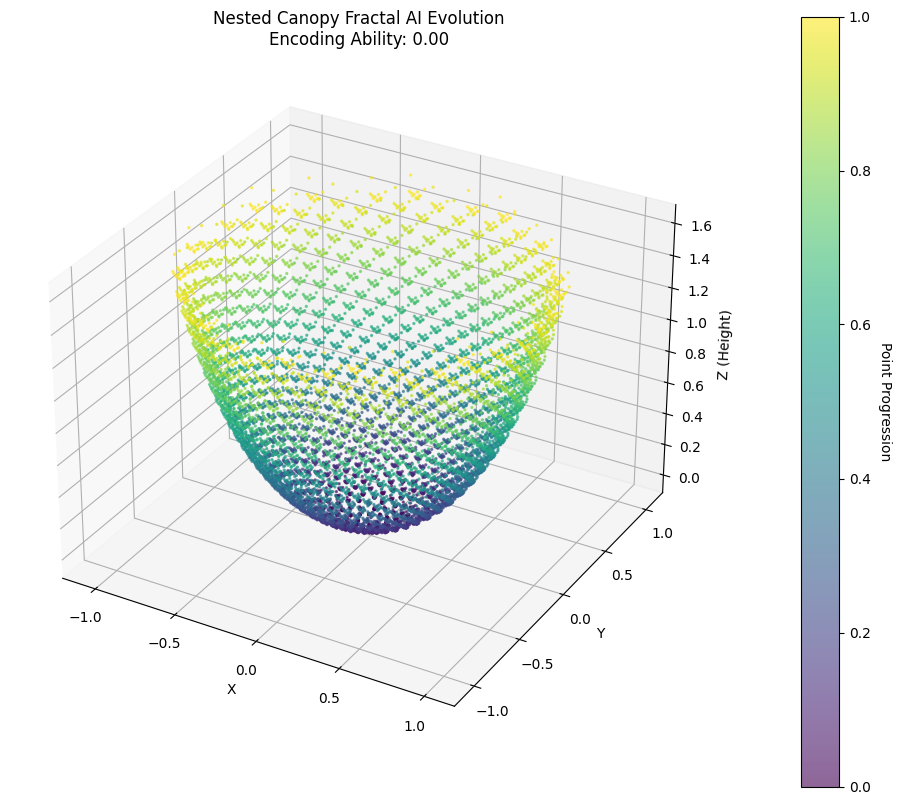

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from mpl_toolkits.mplot3d import Axes3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class SyntheticAI:
    def __init__(self):
        self.encoding_ability = torch.tensor([0.0], device=device)
        self.decoding_ability = torch.tensor([0.0], device=device)

    def train(self):
        self.encoding_ability += torch.rand(1, device=device) * 0.01
        self.decoding_ability += torch.rand(1, device=device) * 0.01

    def encode(self, data):
        return (data + self.encoding_ability) % 256

    def decode(self, encoded_data):
        return (encoded_data - self.decoding_ability) % 256

def generate_substructure(center, radius, iterations):
    points = []
    for i in range(1, iterations + 1):
        angle = i * np.pi * (3 - np.sqrt(5))  # Golden angle
        r = radius / (i + 1)  # 1/n+1 growth
        x = center[0] + r * np.cos(angle)
        y = center[1] + r * np.sin(angle)
        z = center[2] + r
        points.append((x, y, z))
    return points

def generate_nested_canopy(iterations, base, substructure_iterations):
    points = [(0, 0, 0)]
    for i in range(1, iterations):
        height = base ** (i / iterations) - 1
        angle = i * np.pi * (3 - np.sqrt(5))
        radius = np.sqrt(i) / np.sqrt(iterations)
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        new_point = (x, y, height)
        points.append(new_point)
        points.extend(generate_substructure(new_point, radius/5, substructure_iterations))
    return points

def plot_nested_canopy(points, ai):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*points)

    # Plot points
    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, z, c=colors, s=2, alpha=0.6)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Height)')
    plt.title(f"Nested Canopy Fractal AI Evolution\nEncoding Ability: {ai.encoding_ability.item():.2f}")

    # Add colorbar to show progression
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

# [Encoding, decoding, and storage capacity functions remain the same]

def main():
    iterations = 1000  # Main structure iterations
    substructure_iterations = 10  # Substructure iterations for each point
    base = 2.5  # Exponential base for main structure

    start_time = time.time()

    ai = SyntheticAI()
    points = generate_nested_canopy(iterations, base, substructure_iterations)

    fig = plot_nested_canopy(points, ai)

    byte_capacity, bit_capacity = calculate_storage_capacity(points)

    sample_data = b"Hello, Nested Canopy Fractal! This structure combines exponential growth with 1/n+1 substructures, creating a complex, self-similar pattern that could represent intricate hierarchical relationships or multi-scale data storage."
    encoded_data = encode_data_with_error_correction(sample_data, points, ai)
    decoded_data = decode_data_with_error_correction(encoded_data, ai)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Original data: {sample_data}")
    print(f"Decoded data: {decoded_data}")
    print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
    print(f"Execution time: {execution_time:.2f} seconds")
    print(f"Total points: {len(points)}")

    plt.show()

if __name__ == "__main__":
    main()

# To run this code, execute this cell in a GPU-enabled Colab notebook.